# Superbowl Tweet Analysis 

In [2]:
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from pandas import json_normalize
from flatten_json import flatten
from pymongo import cursor as c
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sb_2019 = pd.read_csv('GDAC_2020_Files/flat_sb_2019.csv',lineterminator='\n',low_memory=False)

In [5]:
for i in sb_2019.columns:
    print(i)

_id
created_at
id
id_str
text
display_text_range
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
favorited
retweeted
filter_level
lang
matching_rules
sentiment
user.id
user.id_str
user.name
user.screen_name
user.location
user.url
user.description
user.translator_type
user.derived.locations
user.protected
user.verified
user.followers_count
user.friends_count
user.listed_count
user.favourites_count
user.statuses_count
user.created_at
user.utc_offset
user.time_zone
user.geo_enabled
user.lang
user.contributors_enabled
user.is_translator
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_link_color
user.profile_sidebar_border_color
user.profile_sidebar_fill_color
user.profile_text_color
user.profile_use_backgrou

<h1> 399 Total Variables </h1>

In [4]:
sb_2019.head()

_id                      created_at  \
0  5c57b5f92cec0f358301cf72  Mon Feb 04 03:20:33 +0000 2019   
1  5c57b5f92cec0f358301cf67  Mon Feb 04 03:20:19 +0000 2019   
2  5c57b5f92cec0f358301cf70  Mon Feb 04 03:20:33 +0000 2019   
3  5c57b5f92cec0f358301cf71  Mon Feb 04 03:20:33 +0000 2019   
4  5c57b5f92cec0f358301cf6d  Mon Feb 04 03:20:29 +0000 2019   

                    id               id_str  \
0  1092261599430217728  1092261599430217728   
1  1092261543859884032  1092261543859884032   
2  1092261600608878592  1092261600608878592   
3  1092261599488831488  1092261599488831488   
4  1092261582329995269  1092261582329995269   

                                                text display_text_range  \
0  @NationalCorn @DanaPerino @budlight @millerlig...          [60, 120]   
1  Best commercial BY FAR was #NFL100 ad. Rest we...                NaN   
2  @NationalCorn @budlight @millerlight @Coorslit...           [48, 99]   
3  RT @GameOfThrones: .@TheBudKnight’s watch has ...                NaN   
4  RT @GameOfThrones: .@TheBudKnight’s watch has ...                NaN   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   
1  <a href="http://twitter.com/download/iphone" r...       True   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/iphone" r...      False   
4  <a href="http://twitter.com" rel="nofollow">Tw...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  ...  \
0           1.092217e+18               1.092217e+18  ...   
1                    NaN                        NaN  ...   
2           1.092217e+18               1.092217e+18  ...   
3                    NaN                        NaN  ...   
4                    NaN                        NaN  ...   

   quoted_status.geo.type  quoted_status.geo.coordinates  \
0                     NaN                            NaN   
1                     NaN                            NaN   
2                     NaN                            NaN   
3                     NaN                            NaN   
4                     NaN                            NaN   

  quoted_status.coordinates.type  quoted_status.coordinates.coordinates  \
0                            NaN                                    NaN   
1                            NaN                                    NaN   
2                            NaN                                    NaN   
3                            NaN                                    NaN   
4                            NaN                                    NaN   

   retweeted_status.quoted_status.entities.polls  retweeted_status.geo.type  \
0                                            NaN                        NaN   
1                                            NaN                        NaN   
2                                            NaN                        NaN   
3                                            NaN                        NaN   
4                                            NaN                        NaN   

   retweeted_status.geo.coordinates  retweeted_status.coordinates.type  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   

   retweeted_status.coordinates.coordinates  place.bounding_box  
0                                       NaN                 NaN  
1                                       NaN                 NaN  
2                                       NaN                 NaN  
3                                       NaN                 NaN  
4                                       NaN                 NaN  

[5 rows x 399 colu

In [5]:
sb_2019[sb_2019['user.verified']==True]

_id                      created_at  \
230     5c57b5f92cec0f358301d051  Mon Feb 04 03:24:16 +0000 2019   
340     5c57b5f92cec0f358301d0b9  Mon Feb 04 03:26:11 +0000 2019   
395     5c57b5f92cec0f358301d0f6  Mon Feb 04 03:27:36 +0000 2019   
423     5c57b5f92cec0f358301d112  Mon Feb 04 03:28:22 +0000 2019   
436     5c57b5f92cec0f358301d11b  Mon Feb 04 03:28:33 +0000 2019   
...                          ...                             ...   
708963  5c57f9812cec0f424fb86d33  Sun Feb 03 23:58:13 +0000 2019   
709046  5c57f9812cec0f424fb86d84  Sun Feb 03 23:58:22 +0000 2019   
709069  5c57f9812cec0f424fb86d96  Sun Feb 03 23:58:23 +0000 2019   
709079  5c57f9812cec0f424fb86da3  Sun Feb 03 23:58:24 +0000 2019   
709110  5c57f9812cec0f424fb86dab  Sun Feb 03 23:58:25 +0000 2019   

                         id               id_str  \
230     1092262537477980162  1092262537477980162   
340     1092263018841411584  1092263018841411584   
395     1092263373142745090  1092263373142745090   
423     1092263569197010945  1092263569197010945   
436     1092263612981407744  1092263612981407744   
...                     ...                  ...   
708963  1092210680290258951  1092210680290258951   
709046  1092210720459100163  1092210720459100163   
709069  1092210722556309509  1092210722556309509   
709079  1092210726373150721  1092210726373150721   
709110  1092210731121065984  1092210731121065984   

                                                     text display_text_range  \
230     @GameOfThrones @TheBudKnight @budlight .@GameO...          [39, 140]   
340     RT @NationalCorn: .@BudLight America’s corn fa...                NaN   
395     @KyleMartin32 @budlight *whispers softly*  Mic...          [24, 140]   
423     RT @3PercentConf: One WHOLE WOMAN in a BEER AD...                NaN   
436     My top 5 #SuperBowl ads \n\n@budlight  + @hbo ...           [0, 140]   
...                                                   ...                ...   
708963  Ok @budlight . Good job. Still dedicated to @8...                NaN   
709046  Apparently Coors Light is made near Mordor #Su...                NaN   
709069  To be clear, Bud Light is not brewed with corn...            [0, 90]   
709079             Damn @budlight https://t.co/fJSocN0Xe8            [0, 14]   
709110  RT @KELOBrady: Pushing a barrel of corn syrup ...                NaN   

                                                   source  truncated  \
230     <a href="http://twitter.com" rel="nofollow">Tw...       True   
340     <a href="http://twitter.com/download/android" ...      False   
395     <a href="http://twitter.com" rel="nofollow">Tw...       True   
423     <a href="http://twitter.com/download/iphone" r...      False   
436     <a href="http://twitter.com/download/iphone" r...       True   
...                                                   ...        ...   
708963  <a href="http://twitter.com/download/iphone" r...      False   
709046  <a href="http://twitter.com/download/iphone" r...      False   
709069  <a href="http://twitter.com" rel="nofollow">Tw...      False   
709079  <a href="http://twitter.com/download/android" ...      False   
709110  <a href="http://www.socialnewsdesk.com" rel="n...      False   

        in_reply_to_status_id  in_reply_to_status_id_str  ...  \
230              1.092216e+18               1.092216e+18  ...   
340                       NaN                        NaN  ...   
395              1.092253e+18               1.092253e+18  ...   
423                       NaN                        NaN  ...   
436                       NaN                        NaN  ...   
...                       ...                        ...  ...   
708963                    NaN                        NaN  ...   
709046                    NaN                        NaN  ...   
709069                    NaN                        NaN  ...   
709079                    NaN                        NaN  ...   
709110                    NaN                 

In [6]:
sb_2019[340:341]

_id                      created_at  \
340  5c57b5f92cec0f358301d0b9  Mon Feb 04 03:26:11 +0000 2019   

                      id               id_str  \
340  1092263018841411584  1092263018841411584   

                                                  text display_text_range  \
340  RT @NationalCorn: .@BudLight America’s corn fa...                NaN   

                                                source  truncated  \
340  <a href="http://twitter.com/download/android" ...      False   

     in_reply_to_status_id  in_reply_to_status_id_str  ...  \
340                    NaN                        NaN  ...   

     quoted_status.geo.type  quoted_status.geo.coordinates  \
340                     NaN                            NaN   

    quoted_status.coordinates.type  quoted_status.coordinates.coordinates  \
340                            NaN                                    NaN   

     retweeted_status.quoted_status.entities.polls  retweeted_status.geo.type  \
340                                            NaN                        NaN   

     retweeted_status.geo.coordinates  retweeted_status.coordinates.type  \
340                               NaN                                NaN   

     retweeted_status.coordinates.coordinates  place.bounding_box  
340                                       NaN                 NaN  

[1 rows x 399 columns]

In [7]:
sb_2019[1:2]['user.screen_name']

1    MelanieG_Writer
Name: user.screen_name, dtype: object

In [9]:
sb_2019[sb_2019['user.screen_name']=='MelanieG_Writer']

_id                      created_at  \
1       5c57b5f92cec0f358301cf67  Mon Feb 04 03:20:19 +0000 2019   
317118  5c57e8c22cec0f3ef521a7fc  Mon Feb 04 03:20:19 +0000 2019   
673675  5c57f9812cec0f424fb7e341  Mon Feb 04 03:20:19 +0000 2019   

                         id               id_str  \
1       1092261543859884032  1092261543859884032   
317118  1092261543859884032  1092261543859884032   
673675  1092261543859884032  1092261543859884032   

                                                     text display_text_range  \
1       Best commercial BY FAR was #NFL100 ad. Rest we...                NaN   
317118  Best commercial BY FAR was #NFL100 ad. Rest we...                NaN   
673675  Best commercial BY FAR was #NFL100 ad. Rest we...                NaN   

                                                   source  truncated  \
1       <a href="http://twitter.com/download/iphone" r...       True   
317118  <a href="http://twitter.com/download/iphone" r...       True   
673675  <a href="http://twitter.com/download/iphone" r...       True   

        in_reply_to_status_id  in_reply_to_status_id_str  ...  \
1                         NaN                        NaN  ...   
317118                    NaN                        NaN  ...   
673675                    NaN                        NaN  ...   

        quoted_status.geo.type  quoted_status.geo.coordinates  \
1                          NaN                            NaN   
317118                     NaN                            NaN   
673675                     NaN                            NaN   

       quoted_status.coordinates.type  quoted_status.coordinates.coordinates  \
1                                 NaN                                    NaN   
317118                            NaN                                    NaN   
673675                            NaN                                    NaN   

        retweeted_status.quoted_status.entities.polls  \
1                                                 NaN   
317118                                            NaN   
673675                                            NaN   

        retweeted_status.geo.type  retweeted_status.geo.coordinates  \
1                             NaN                               NaN   
317118                        NaN                               NaN   
673675                        NaN                               NaN   

        retweeted_status.coordinates.type  \
1                                     NaN   
317118                                NaN   
673675                                NaN   

        retweeted_status.coordinates.coordinates  place.bounding_box  
1                                            NaN                 NaN  
317118                                       NaN                 NaN  
673675                                       NaN                 NaN  

[3 rows x 399 columns]

In [10]:
sb_2019[1:2]['sentiment']

1    negative
Name: sentiment, dtype: object

In [11]:
sb_2019[1:2]['Brand']

1    Verizon
Name: Brand, dtype: object

In [12]:
list(sb_2019[1:2]['text'])

['Best commercial BY FAR was #NFL100 ad. Rest were largely unforgettable or just plain dumb. And so sick of the #BudLight knights thing. Silly to begin with. But today’s were just stupid. As for others,  #Verizon 1st responder one was good. #SuperBowlLlll']

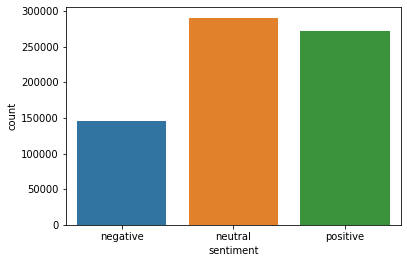

In [13]:
sns.countplot(x='sentiment',data=sb_2019)

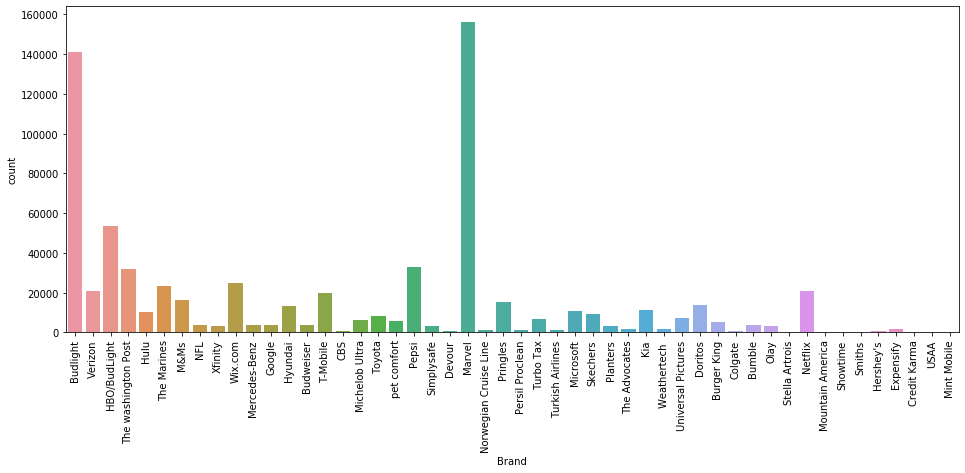

In [14]:
plt.figure(figsize=(16,6))
chart = sns.countplot(x='Brand',data=sb_2019)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

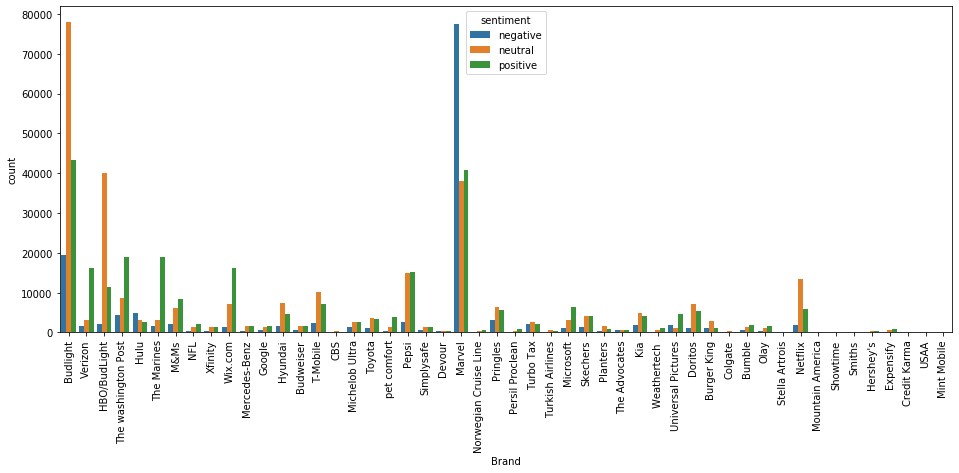

In [15]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.  
plt.figure(figsize=(16,6))
chart = sns.countplot('Brand', hue='sentiment',data=sb_2019)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);